In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
veriler = pd.read_csv("veriseti_20220203_olimpiyatlar.csv") # Verilerin olduğu .csv dosyası C: Kullanıcıla/ps/ içerisinde

In [6]:
veriler.head() # head(sayi) ile veri tablosunun ilk sayi tane satırı gösterilir. Varsayılan 5 satırdır.

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### Veri tablosu incelenmeli Başlıklar, olduğu yazılışla kullanılacağı için dikkat et!

In [1]:
veriler.info() # info() ile veri tablosunun bir özeti (kolonlar, veri adedi, veri tipleri) görüntülenir

NameError: name 'veriler' is not defined

In [7]:
veriler.columns # .columns ile de kolon/sütun başlıkları (index) listesi görüntülenir.

Index(['ID', 'Name', 'Gender', 'Age', 'Height', 'Weight', 'Team', 'NOC',
       'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

## Sütun isimleri değiştirmek için .rename(...)
Kolon-sütun başlıkları sonraki işlemlerde harf küçük büyüklüğüne varana kadar olduğu biçimiyle kullanılacak. Bu açıdan önemli...
rename(fonksiyonu içinde columns parametresi ile sözlük biçiminde sütun başlıkları Türkçeleştirilebilir, inplace=True ile değiştirdiğimiz haliyle başlıklarda görünmesini sağladık.)

In [8]:
veriler.rename(columns={"ID": "id", 
                        "Name": "isim",
                       "Gender": "cinsiyet",
                       "Age": "yas",
                       "Height": "boy",
                       "Weight": "kilo",
                       "Team": "takım",
                       "NOC": "uok",
                       "Games": "oyunlar",
                       "Year": "yıl",
                       "Season": "sezon",
                       "City": "sehir",
                       "Sport": "spor",
                        "Event": "etkinlik",
                        "Medal": "madalya"}, inplace=True) 

In [9]:
veriler.head()

,id,isim,cinsiyet,yas,boy,kilo,takım,uok,oyunlar,yıl,sezon,sehir,spor,etkinlik,madalya
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


# Gereksiz bilgi içeren sütunların temizlenmesi. DROP

In [10]:
temizlenen_veri = veriler.drop(["id", "oyunlar"], axis = 1) 
# temizlenecek sütunlar bir liste içinde, axis=1 ile sütunda silme işlemi gerçekleştirilir.

In [11]:
temizlenen_veri.head()

,isim,cinsiyet,yas,boy,kilo,takım,uok,yıl,sezon,sehir,spor,etkinlik,madalya
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


# Eksik verilerin yerlerine ortalama gibi bir değer girilmesi

In [12]:
tekrarsiz_etkinlikler = pd.unique(temizlenen_veri.etkinlik)
print(f"Tekrar edenler tekil hale getirildiğinde {len(tekrarsiz_etkinlikler)} tane tekrarsız etkinlik olduğu görülüyor.")
tekrarsiz_etkinlikler


Tekrar edenler tekil hale getirildiğinde 765 tane tekrarsız etkinlik olduğu görülüyor.


array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Speed Skating Women's 500 metres",
       "Speed Skating Women's 1,000 metres",
       "Cross Country Skiing Men's 10 kilometres",
       "Cross Country Skiing Men's 50 kilometres",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Cross Country Skiing Men's 4 x 10 kilometres Relay",
       "Cross Country Skiing Men's 30 kilometres",
       "Athletics Women's 100 metres",
       "Athletics Women's 4 x 100 metres Relay",
       "Ice Hockey Men's Ice Hockey",
       "Swimming Men's 400 metres Freestyle", "Badminton Men's Singles",
       "Sailing Women's Windsurfer",
       "Biathlon Women's 7.5 kilometres Sprint",
       "Swimming Men's 200 metres Breaststroke",
       "Swimming Men's 400 metres Breaststroke",
       "Gymnastics Men's Individual All-Around",
       "Gymnastics Men's Team All-Around",
       "Gymnastics Men's F

#### Yukarıdaki 765 etkinliğin her birinin sporcu boy ve kilo ortalamalarını hesaplayıp eksik verileri bu değerlerle doldurma

In [30]:
veri_kopya = temizlenen_veri.copy() # veri tablosunun bir kopyası

"""for e in tekrarsiz_etkinlikler: # Tüm etkinlikler üzerinde dolaşarak işlem yaptırmak için
    filtre = veri_kopya.etkinlik == e
    filtrelenmis = veri_kopya[filtre]
    for i in ["boy", "kilo"]:  # eksik verilerin olduğu sütunların listesi
        ortalama = np.mean(filtrelenmis[i]) # her etkinlik için sporcuların boy ve kilo ortalaması
        ortalama_y = np.round(ortalama) # ortalamaları yuvarla, virgülden sonra 2 basamağa kadar
        if ~np.isnan(ortalama_y): # Eğer ortalama hesaplanmışsa / NaN değilse aşağıda eksik veriyi ortalama ile doldur.
            filtrelenmis[i] = filtrelenmis[i].fillna(ortalama_y)
        else: # Eğer etkinlikte veri olmadığından ortalama hesaplanmamışsa / NaN ise
            tum_ortalama = np.round(np.mean(veri_kopya[i]), 2)
            filtrelenmis[i] = filtrelenmis[i].fillna(tum_ortalama)
    veri_kopya[filtre] = filtrelenmis # Doldurulan değerleri tabloya aktardık"""

'for e in tekrarsiz_etkinlikler: # Tüm etkinlikler üzerinde dolaşarak işlem yaptırmak için\n    filtre = veri_kopya.etkinlik == e\n    filtrelenmis = veri_kopya[filtre]\n    for i in ["boy", "kilo"]:  # eksik verilerin olduğu sütunların listesi\n        ortalama = np.mean(filtrelenmis[i]) # her etkinlik için sporcuların boy ve kilo ortalaması\n        ortalama_y = np.round(ortalama) # ortalamaları yuvarla, virgülden sonra 2 basamağa kadar\n        if ~np.isnan(ortalama_y): # Eğer ortalama hesaplanmışsa / NaN değilse aşağıda eksik veriyi ortalama ile doldur.\n            filtrelenmis[i] = filtrelenmis[i].fillna(ortalama_y)\n        else: # Eğer etkinlikte veri olmadığından ortalama hesaplanmamışsa / NaN ise\n            tum_ortalama = np.round(np.mean(veri_kopya[i]), 2)\n            filtrelenmis[i] = filtrelenmis[i].fillna(tum_ortalama)\n    veri_kopya[filtre] = filtrelenmis # Doldurulan değerleri tabloya aktardık'

In [14]:
veri_kopya.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   isim      271116 non-null  object 
 1   cinsiyet  271116 non-null  object 
 2   yas       261642 non-null  float64
 3   boy       271116 non-null  float64
 4   kilo      271116 non-null  float64
 5   takım     271116 non-null  object 
 6   uok       271116 non-null  object 
 7   yıl       271116 non-null  int64  
 8   sezon     271116 non-null  object 
 9   sehir     271116 non-null  object 
 10  spor      271116 non-null  object 
 11  etkinlik  271116 non-null  object 
 12  madalya   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


In [15]:
temizlenen_veri = veri_kopya.copy() # Düzenlediğimiz veri tablosunu asıl tabloya taşıdık

### Yaş verilerinden eksik olanlarını tüm yaşların ortalaması ile değiştirelim

In [16]:
yas_ort = np.round(np.mean(temizlenen_veri.yas), 2)
print(f"Yaş ortalması: {yas_ort}")
temizlenen_veri.yas = temizlenen_veri.yas.fillna(yas_ort)
temizlenen_veri.info()

Yaş ortalması: 25.56
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   isim      271116 non-null  object 
 1   cinsiyet  271116 non-null  object 
 2   yas       271116 non-null  float64
 3   boy       271116 non-null  float64
 4   kilo      271116 non-null  float64
 5   takım     271116 non-null  object 
 6   uok       271116 non-null  object 
 7   yıl       271116 non-null  int64  
 8   sezon     271116 non-null  object 
 9   sehir     271116 non-null  object 
 10  spor      271116 non-null  object 
 11  etkinlik  271116 non-null  object 
 12  madalya   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


### Madalya alanları sadece tabloda bırakmak için

In [17]:
madalya_degisken = ~pd.isnull(temizlenen_veri.madalya) # temizlenen veride madalya sütunu NaN olmayanlar değişkeni
veri_tablosu = temizlenen_veri[madalya_degisken] # Madalya sütunu boş olmayanlar tablosu
veri_tablosu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39783 entries, 3 to 271103
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   isim      39783 non-null  object 
 1   cinsiyet  39783 non-null  object 
 2   yas       39783 non-null  float64
 3   boy       39783 non-null  float64
 4   kilo      39783 non-null  float64
 5   takım     39783 non-null  object 
 6   uok       39783 non-null  object 
 7   yıl       39783 non-null  int64  
 8   sezon     39783 non-null  object 
 9   sehir     39783 non-null  object 
 10  spor      39783 non-null  object 
 11  etkinlik  39783 non-null  object 
 12  madalya   39783 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 4.2+ MB


# Temizlenmiş verilerden oluşan tablo ile Tek Özellik üzerinden Veri Analizi

In [18]:
veri_tablosu.to_csv("temizlenmisVeriseti_olimpiyatlar.csv", index = False) # Temiz veri tablomuzu .csv dosyası yaptık

#### Her bir özellik için grafik çizdirmek için fonksiyon:

In [19]:
def HistogramCiz(ozellik):
    """
    Girilen özellik için Histogram grafiği çizer...
    """
    plt.figure()
    plt.hist(veri_tablosu[ozellik], bins = 77, color = "orange")
    plt.xlabel(ozellik)
    plt.ylabel("Veri adedi")
    plt.title(f"'{ozellik}' özelliği Verileri Histogramı")
    plt.show()


In [20]:
veri_tablosu.describe() # Verilerimiz hakkında genel istatistik bilgileri görüntülemek için

,yas,boy,kilo,yıl
count,39783.000000,39783.000000,39783.000000,39783.000000
mean,25.918456,177.341282,73.745826,1973.943845
std,5.859569,10.162809,13.982601,33.822857
min,10.000000,136.000000,28.000000,1896.000000
25%,22.000000,170.000000,64.000000,1952.000000
50%,25.000000,177.000000,73.000000,1984.000000
75%,29.000000,184.000000,82.000000,2002.000000
max,73.000000,223.000000,182.000000,2016.000000


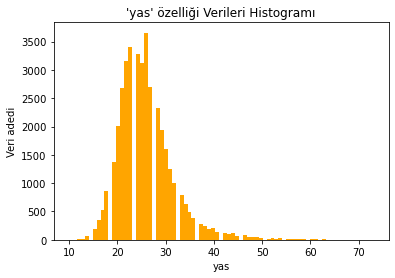

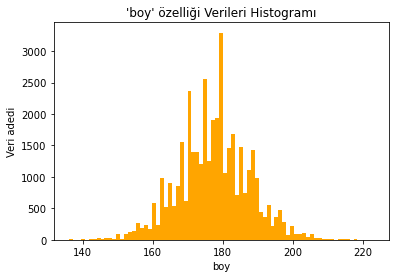

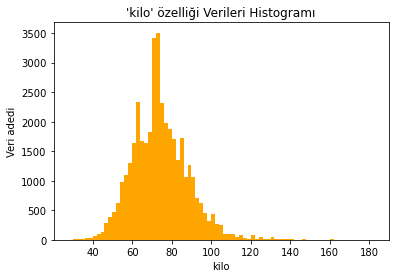

In [21]:
sayisal_ozellikler = ["yas", "boy", "kilo", ]
for i in sayisal_ozellikler:
    HistogramCiz(i)

In [22]:
def CubukGrafikCiz(ozellik, n = 5):
    """
    Girilen özellik için Histogram grafiği çizer...
    """
    degerler = veri_tablosu[ozellik]
    veri_say = degerler.value_counts()[:n]
    plt.figure()
    plt.bar(veri_say.index, veri_say, color = "lightgreen")
    plt.xticks(veri_say.index, veri_say.index.values, rotation = 45)
    plt.xlabel(ozellik)
    plt.ylabel("Veri adedi")
    plt.title(f"'{ozellik}' özelliği Verileri Histogramı")
    print(f"{ozellik} \n {veri_say}")
    plt.show()

In [23]:
kategorik_ozellikler = ['isim', 'cinsiyet', 'takım', 'uok', 'sezon', 'sehir', 'spor', 'etkinlik', 'madalya']


isim 
 Michael Fred Phelps, II               28
Larysa Semenivna Latynina (Diriy-)    18
Nikolay Yefimovich Andrianov          15
Ole Einar Bjrndalen                   13
Borys Anfiyanovych Shakhlin           13
Name: isim, dtype: int64


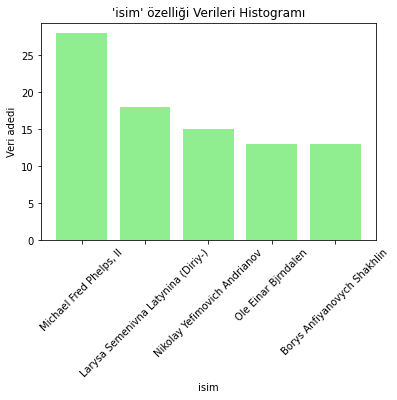

cinsiyet 
 M    28530
F    11253
Name: cinsiyet, dtype: int64


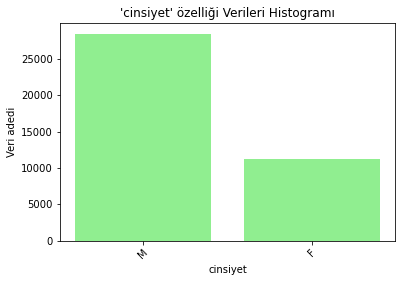

takım 
 United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Name: takım, dtype: int64


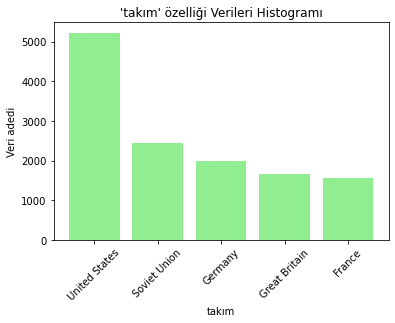

uok 
 USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
Name: uok, dtype: int64


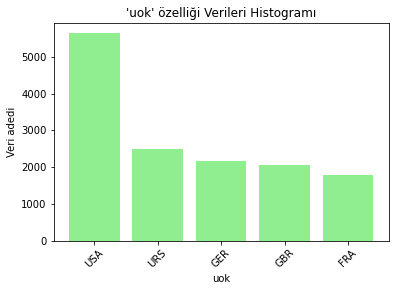

sezon 
 Summer    34088
Winter     5695
Name: sezon, dtype: int64


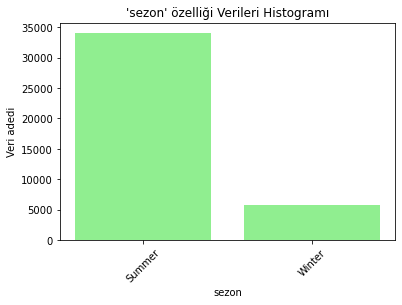

sehir 
 London            3624
Athina            2602
Los Angeles       2123
Beijing           2048
Rio de Janeiro    2023
Name: sehir, dtype: int64


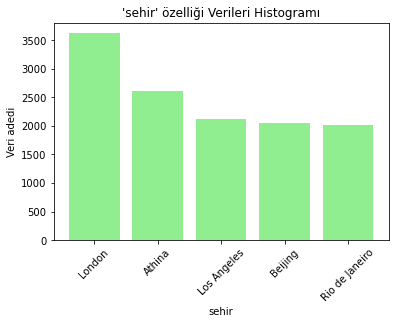

spor 
 Athletics     3969
Swimming      3048
Rowing        2945
Gymnastics    2256
Fencing       1743
Name: spor, dtype: int64


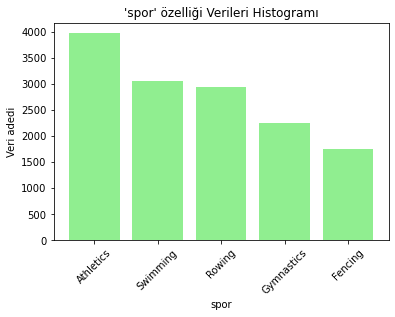

etkinlik 
 Football Men's Football        1269
Ice Hockey Men's Ice Hockey    1230
Hockey Men's Hockey            1050
Water Polo Men's Water Polo     866
Rowing Men's Coxed Eights       730
Name: etkinlik, dtype: int64


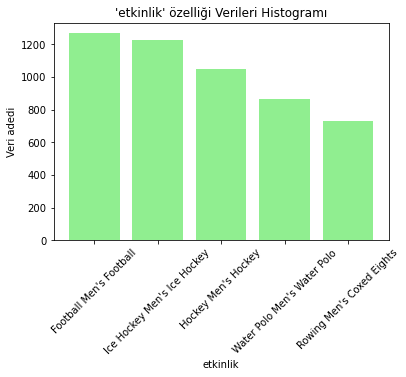

madalya 
 Gold      13372
Bronze    13295
Silver    13116
Name: madalya, dtype: int64


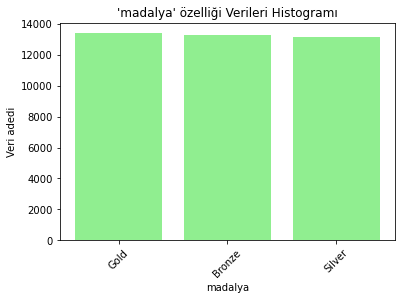

In [24]:
for i in kategorik_ozellikler:
    CubukGrafikCiz(i)

# Veri Analizi
### Verileri Ayrıştırma

In [29]:
erkek = veri_tablosu[veri_tablosu.cinsiyet == "M"]
erkek.head(5)

,isim,cinsiyet,yas,boy,kilo,takım,uok,yıl,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.0,96.0,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.0,77.0,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.0,75.0,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [32]:
kadin = veri_tablosu[veri_tablosu.cinsiyet == "F"]
kadin.head(5)

,isim,cinsiyet,yas,boy,kilo,takım,uok,yıl,sezon,sehir,spor,etkinlik,madalya
79,Ragnhild Margrethe Aamodt,F,27.0,163.0,69.0,Norway,NOR,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
91,Willemien Aardenburg,F,22.0,166.0,61.0,Netherlands,NED,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze
105,Ann Kristin Aarnes,F,23.0,182.0,64.0,Norway,NOR,1996,Summer,Atlanta,Football,Football Women's Football,Bronze
161,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
163,Mariya Vasilyevna Abakumova (-Tarabina),F,22.0,179.0,80.0,Russia,RUS,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,Silver


#### Boy ve Kilo arasındaki ilişkiyi incelemek

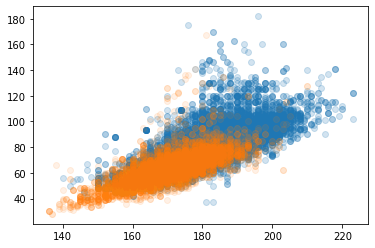

In [61]:
plt.figure()
plt.scatter(erkek.boy, erkek.kilo, alpha = 0.2)
plt.scatter(kadin.boy, kadin.kilo, alpha = 0.1)
plt.show()

In [62]:
veri_tablosu.corr() # veri özellikleri arasında korelasyon değerlerini bulmak için CORR()

,yas,boy,kilo,yıl
yas,1.000000,0.062512,0.137268,-0.086898
boy,0.062512,1.000000,0.794321,0.047279
kilo,0.137268,0.794321,1.000000,-0.006138
yıl,-0.086898,0.047279,-0.006138,1.000000


In [63]:
erkek.corr()

,yas,boy,kilo,yıl
yas,1.000000,-0.043321,0.047338,-0.086835
boy,-0.043321,1.000000,0.742242,0.258013
kilo,0.047338,0.742242,1.000000,0.208342
yıl,-0.086835,0.258013,0.208342,1.000000


In [64]:
kadin.corr()

,yas,boy,kilo,yıl
yas,1.000000,0.111809,0.168253,0.186895
boy,0.111809,1.000000,0.740012,0.142150
kilo,0.168253,0.740012,1.000000,0.119088
yıl,0.186895,0.142150,0.119088,1.000000


# Kategorik Verileri Sayısallaştırmak

In [66]:
veri_t = veri_tablosu.copy()
veri_t = pd.get_dummies(veri_t, columns = ["madalya"])
veri_t.head()

,isim,cinsiyet,yas,boy,kilo,takım,uok,yıl,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
3,Edgar Lindenau Aabye,M,34.0,182.0,96.0,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
37,Arvo Ossian Aaltonen,M,30.0,182.0,77.0,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0
38,Arvo Ossian Aaltonen,M,30.0,177.0,75.0,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1,0,0
40,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,1,0,0
41,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,1,0,0


### Madalyaların bazı değişkenlere göre ilişkiisi

In [67]:
veri_t.corr()

,yas,boy,kilo,yıl,madalya_Bronze,madalya_Gold,madalya_Silver
yas,1.000000,0.062512,0.137268,-0.086898,-0.005584,-0.002576,0.008192
boy,0.062512,1.000000,0.794321,0.047279,-0.009755,0.015172,-0.005457
kilo,0.137268,0.794321,1.000000,-0.006138,-0.009052,0.012785,-0.003764
yıl,-0.086898,0.047279,-0.006138,1.000000,0.026085,-0.017087,-0.009004
madalya_Bronze,-0.005584,-0.009755,-0.009052,0.026085,1.000000,-0.504110,-0.496859
madalya_Gold,-0.002576,0.015172,0.012785,-0.017087,-0.504110,1.000000,-0.499022
madalya_Silver,0.008192,-0.005457,-0.003764,-0.009004,-0.496859,-0.499022,1.000000


## Verileri Gruplandırma

In [90]:
veri_t[["sehir", "uok"]].groupby(["sehir"]).head() # listelenen sütunlardan gruplandırılıyor

,sehir,uok
3,Paris,DEN
37,Antwerpen,FIN
38,Antwerpen,FIN
40,Sochi,FIN
41,London,FIN
...,...,...
9932,Sapporo,SWE
10065,Calgary,AUT
10877,Sapporo,NOR
11726,Sapporo,NED


# Verileri Sıralamak

In [89]:
veri_t.sort_values(by = ["yas", "boy"], ascending = True)

,isim,cinsiyet,yas,boy,kilo,takım,uok,yıl,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
142882,Dimitrios Loundras,M,10.0,159.00,66.00,Ethnikos Gymnastikos Syllogos,GRE,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",1,0,0
79024,Luigina Giavotti,F,11.0,156.00,47.00,Italy,ITA,1928,Summer,Amsterdam,Gymnastics,Gymnastics Women's Team All-Around,0,0,1
148942,Carla Marangoni,F,12.0,156.00,47.00,Italy,ITA,1928,Summer,Amsterdam,Gymnastics,Gymnastics Women's Team All-Around,0,0,1
251495,Ines Vercesi,F,12.0,156.00,47.00,Italy,ITA,1928,Summer,Amsterdam,Gymnastics,Gymnastics Women's Team All-Around,0,0,1
192507,Dorothy Poynton-Hill (-Teuber),F,12.0,162.00,55.00,United States,USA,1928,Summer,Amsterdam,Diving,Diving Women's Springboard,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150755,Charles William Martin,M,71.0,175.43,71.09,Crabe II-1,FRA,1900,Summer,Paris,Sailing,Sailing Mixed 0.5-1 Ton,0,0,1
150756,Charles William Martin,M,71.0,175.43,71.09,Crabe II-4,FRA,1900,Summer,Paris,Sailing,Sailing Mixed 0.5-1 Ton,1,0,0
60009,Jozu Dupon,M,72.0,175.43,71.09,Belgium,BEL,1936,Summer,Berlin,Art Competitions,"Art Competitions Mixed Sculpturing, Medals",1,0,0
233395,Oscar Gomer Swahn,M,72.0,179.00,71.09,Sweden,SWE,1920,Summer,Antwerpen,Shooting,"Shooting Men's Running Target, Double Shot, Team",0,0,1


## Verileri toplamak

In [97]:
veri_t[["yas", "kilo", "boy"]].max() # SUM() ile toplama, MEAN() ile ortalama, MIN() ve MAX() metot isimleri küçük harfle!

yas      73.0
kilo    182.0
boy     223.0
dtype: float64

In [114]:
veri_madalya = veri_t[["takım", "madalya_Gold", "madalya_Silver", "madalya_Bronze"]].groupby(["takım"], as_index = False)
veri_madalya.head()

,takım,madalya_Gold,madalya_Silver,madalya_Bronze
3,Denmark/Sweden,1,0,0
37,Finland,0,0,1
38,Finland,0,0,1
40,Finland,0,0,1
41,Finland,0,0,1
...,...,...,...,...
267289,Nirefs,1,0,0
269085,China-3,0,0,1
269575,Unified Team-2,0,0,1
269845,West Germany-2,1,0,0


In [109]:
veri_madalya.sum().sort_values(by="madalya_Gold", ascending = False)

,takım,madalya_Gold,madalya_Silver,madalya_Bronze
462,United States,2474.0,1512.0,1233.0
403,Soviet Union,1058.0,716.0,677.0
165,Germany,679.0,627.0,678.0
215,Italy,535.0,508.0,484.0
171,Great Britain,519.0,582.0,572.0
...,...,...,...,...
230,Kerstin-1,0.0,0.0,3.0
226,K Division Metropolitan Police Team-3,0.0,0.0,8.0
224,Joy,0.0,2.0,0.0
220,Japan-1,0.0,2.0,0.0


In [115]:
veri_madalya2 = veri_t[["sehir", "madalya_Gold", "madalya_Silver", "madalya_Bronze"]].groupby(["sehir"], as_index = False)
veri_madalya2.sum().sort_values(by="madalya_Gold", ascending = False)

,sehir,madalya_Gold,madalya_Silver,madalya_Bronze
17,London,1215.0,1195.0,1214.0
3,Athina,883.0,859.0,860.0
18,Los Angeles,726.0,691.0,706.0
6,Beijing,671.0,667.0,710.0
27,Rio de Janeiro,665.0,655.0,703.0
38,Sydney,663.0,661.0,680.0
4,Atlanta,608.0,605.0,629.0
5,Barcelona,559.0,549.0,604.0
33,Seoul,520.0,513.0,549.0
2,Antwerpen,493.0,448.0,367.0


In [171]:
from collections import Counter
def aykırıDegerlerBul(vt, ozellik):
    aykırı_degerler = []
    for c in ozellik:
        Q1 = np.percentile(vt[c], 25) # ilk çeyrek verileri
        Q3 = np.percentile(vt[c], 75) # 3. çeyrek verileri
        fark = Q3 - Q1
        ek_adım = fark * 1.5
        aykr_dgr = vt[(vt[c] < Q1 - ek_adım) | (vt[c] > Q3 + ek_adım)].index
        aykırı_degerler.extend(aykr_dgr)
    aykırı_degerler = Counter(aykırı_degerler) # aykırı değerleri ayıkla
    fazla_aykırılar = list(i for i, v in aykırı_degerler.items() if v > 1)
    return fazla_aykırılar
        

In [175]:
anomali_veriler = veri_t.loc[aykırıDegerlerBul(veri_t, ["yas", "boy", "kilo"])]
anomali_veriler[anomali_veriler.spor == "Basketball"]

,isim,cinsiyet,yas,boy,kilo,takım,uok,yıl,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
8834,Franjo Arapovi,M,23.0,211.0,120.0,Yugoslavia,YUG,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,0,0,1
8835,Franjo Arapovi,M,27.0,211.0,120.0,Croatia,CRO,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0,0,1
21577,Oleksandr Mykhailovych Bielostienniy,M,21.0,214.0,117.0,Soviet Union,URS,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,1,0,0
21578,Oleksandr Mykhailovych Bielostienniy,M,29.0,214.0,117.0,Soviet Union,URS,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,0,1,0
25598,"Carlos Austin Boozer, Jr.",M,22.0,206.0,117.0,United States,USA,2004,Summer,Athina,Basketball,Basketball Men's Basketball,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270119,Rajko ii,M,21.0,210.0,110.0,Yugoslavia,YUG,1976,Summer,Montreal,Basketball,Basketball Men's Basketball,0,0,1
270120,Rajko ii,M,25.0,210.0,110.0,Yugoslavia,YUG,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,0,1,0
270121,Rajko ii,M,29.0,210.0,110.0,Yugoslavia,YUG,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,1,0,0
270740,Eurelijus ukauskas,M,22.0,218.0,115.0,Lithuania,LTU,1996,Summer,Atlanta,Basketball,Basketball Men's Basketball,1,0,0


# PIVOT Tablo Oluşturma - Önemli

## Çok değişkenli Analiz için PIVOT Tablo oluşturulur

In [161]:
pivot_tablomuz = veri_tablosu.pivot_table(index = "madalya", columns = "cinsiyet",
                                    values = ["boy", "kilo", "yas"], 
                                   aggfunc = {"boy": np.mean, "kilo": np.mean, "yas": [min, max, np.std]})
pivot_tablomuz

boy                   kilo              yas              \
                mean                   mean              max         min   
cinsiyet           F           M          F          M     F     M     F   
madalya                                                                    
Bronze    170.006189  180.050252  62.763023  77.845036  69.0  72.0  12.0   
Gold      170.451198  180.324635  63.207208  78.197538  63.0  64.0  13.0   
Silver    170.237614  180.059005  62.875041  77.969057  55.0  73.0  11.0   

                                    
                     std            
cinsiyet     M         F         M  
madalya                             
Bronze    10.0  5.329229  5.870340  
Gold      13.0  5.219615  5.987807  
Silver    13.0  5.253111  6.098221

# Zaman Serileri

In [198]:
veri_zaman = veri_tablosu.copy()

# a = sorted(veri_zaman.yıl.unique())
b = np.sort(veri_zaman.yıl.unique())
veri_zaman.yıl.unique()


array([1900, 1920, 2014, 1948, 1952, 1992, 1994, 2002, 2006, 2008, 1988,
       1996, 1960, 1912, 1956, 2016, 2012, 2000, 2004, 1980, 1984, 1936,
       1906, 1964, 1972, 1924, 1904, 1932, 1928, 1968, 1976, 2010, 1908,
       1998, 1896], dtype=int64)

In [204]:
zaman_ = pd.to_datetime(veri_zaman["yıl"], format = "%Y")
zaman_

3        1900-01-01
37       1920-01-01
38       1920-01-01
40       2014-01-01
41       1948-01-01
            ...    
271078   1956-01-01
271080   1964-01-01
271082   1980-01-01
271102   2000-01-01
271103   2004-01-01
Name: yıl, Length: 39783, dtype: datetime64[ns]

### Veri Tablosunun index bilgisini değiştirmek